In [1]:
#!pip install -U textblob
#!pip install vaderSentiment
#!pip install flair
#!pip install pycorenlp
#!pip install happytransformer
#!pip install afinn
#!pip install NRCLex
#!pip install senticnet
#!pip install pattern
#!pip install tweepy
#!pip install googletrans==3.1.0a0
#!pip install wordcloud

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from sklearn.metrics import (
    accuracy_score, 
    recall_score,
    precision_score,
    confusion_matrix
)

from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns
from time import time

In [4]:
def model_metrics(target,predicted):
    print("--------------Metrics-------------------")
    print(classification_report(target,predicted))
    print("\n--------------CONFUSION-MATRIX-------------------")
    print('')

    conf_mat = confusion_matrix(target,predicted)
    print('Confusion matrix:\n', conf_mat)

    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten()/np.sum(conf_mat)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplots(figsize=(10,6))
    sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

#          TextBlob

In [5]:
from textblob import TextBlob

In [6]:
df=pd.read_csv("sentiment140.csv")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
def tb_sentiment(sentence):
    blob = TextBlob(sentence)
    if blob.sentiment[0]<0:
        return 0
    else:
        return 4

In [8]:
start=time()
df['compound'] = df['text'].apply(lambda text: tb_sentiment(text))
end=time()
df.head(100)

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",4
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,4
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...,...,...
95,0,1467836448,Mon Apr 06 22:26:27 PDT 2009,NO_QUERY,Dogbook,Strider is a sick little puppy http://apps.fa...,0
96,0,1467836500,Mon Apr 06 22:26:28 PDT 2009,NO_QUERY,natalieantipas,"so rylee,grace...wana go steve's party or not?...",4
97,0,1467836576,Mon Apr 06 22:26:29 PDT 2009,NO_QUERY,timdonnelly,"hey, I actually won one of my bracket pools! T...",0
98,0,1467836583,Mon Apr 06 22:26:29 PDT 2009,NO_QUERY,homeworld,"@stark YOU don't follow me, either and i work...",0


In [9]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
tb_acc=t/(t+f)
tb_acc

0.616

In [10]:
tb_time=end-start
print("The time taken:",tb_time)

The time taken: 1.0501363277435303


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       500
           4       0.58      0.88      0.70       500

    accuracy                           0.62      1000
   macro avg       0.66      0.62      0.59      1000
weighted avg       0.66      0.62      0.59      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[178 322]
 [ 62 438]]


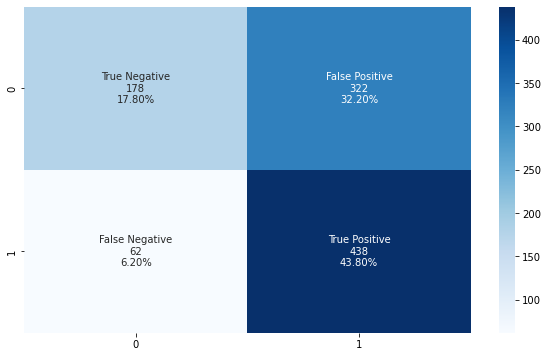

In [11]:
model_metrics(df['target'],df['compound'])

# VADER

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
df=pd.read_csv("sentiment140.csv")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
def sentiment_scores(sentence):
    sent = SentimentIntensityAnalyzer()
    sentiment_dict = sent.polarity_scores(sentence)
    if sentiment_dict['compound']<0:
        return 0
    else:
        return 4

In [15]:
start=time()
df['compound'] = df['text'].apply(lambda text: sentiment_scores(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [16]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
vd_acc=t/(t+f)
vd_acc

0.687

In [17]:
vd_time=end-start
print("The time taken:",vd_time)

The time taken: 35.54891800880432


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.81      0.48      0.61       500
           4       0.63      0.89      0.74       500

    accuracy                           0.69      1000
   macro avg       0.72      0.69      0.67      1000
weighted avg       0.72      0.69      0.67      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[242 258]
 [ 55 445]]


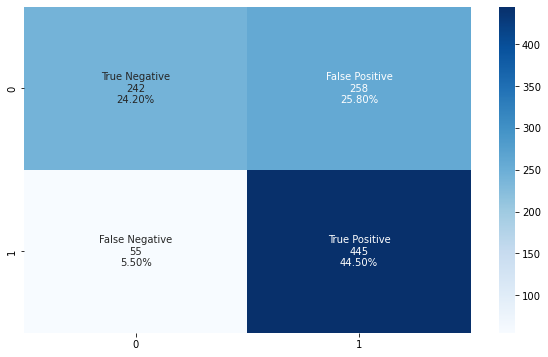

In [18]:
model_metrics(df['target'],df['compound'])

# Flair

In [15]:
from flair.models import TextClassifier
from flair.data import Sentence

In [16]:
df=pd.read_csv("sentiment140.csv")
df.head()
classifier = TextClassifier.load('en-sentiment')

2021-12-12 16:36:47,976 loading file C:\Users\Sabrina\.flair\models\sentiment-en-mix-distillbert_4.pt


In [21]:
def flair_sentiment(sentence):
    text = Sentence(sentence)
    classifier.predict(text)
    label = str(text.labels[0]).split()[0]
    if label=="NEGATIVE":
        return 0
    else:
        return 4

In [22]:
start=time()
df['compound'] = df['text'].apply(lambda text: flair_sentiment(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [23]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
flair_acc=t/(t+f)
flair_acc

0.711

In [24]:
flair_time=end-start
print("The time taken:",flair_time)

The time taken: 89.60622310638428


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       500
           4       0.72      0.70      0.71       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[363 137]
 [152 348]]


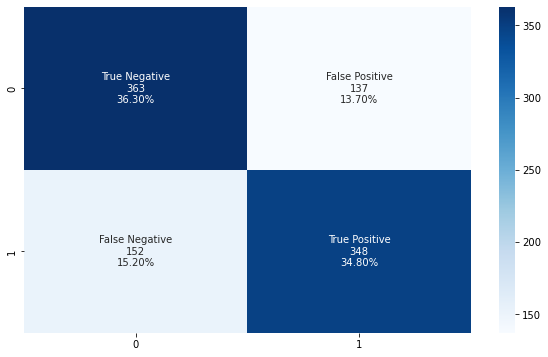

In [25]:
model_metrics(df['target'],df['compound'])

# Stanford CoreNLP

In [26]:
from pycorenlp import StanfordCoreNLP
import re

In [27]:
df=pd.read_csv("sentiment140.csv")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [28]:
def corenlp_sentiment(sentence):
    text=re.sub('[^A-Za-z0-9.]+', ' ',sentence)
    nlp = StanfordCoreNLP('http://localhost:9000')
    results = nlp.annotate(text,properties={
        'annotators':'sentiment, ner, pos',
        'outputFormat': 'json',
        'timeout': 50000,
        })
    sentsum=0
    count=0
    for s in results["sentences"]:
        sentsum+=int(s["sentimentValue"])
        count+=1
    sentavg=sentsum/count
    if sentavg<2:
        return 0
    else:
        return 4

In [29]:
start=time()
df['compound'] = df['text'].apply(lambda text: corenlp_sentiment(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",4
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,4
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [30]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
core_acc=t/(t+f)
core_acc

0.63

In [31]:
core_time=end-start
print("The time taken:",core_time)

The time taken: 329.44484305381775


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       500
           4       0.60      0.79      0.68       500

    accuracy                           0.63      1000
   macro avg       0.65      0.63      0.62      1000
weighted avg       0.65      0.63      0.62      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[233 267]
 [103 397]]


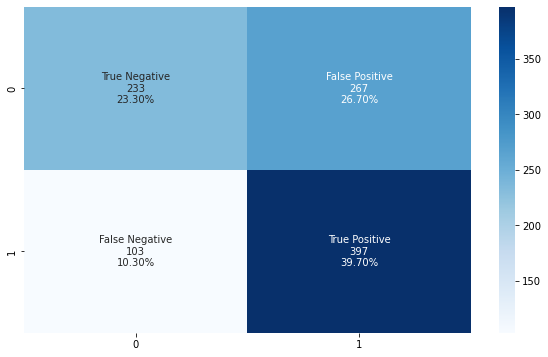

In [32]:
model_metrics(df['target'],df['compound'])

# AFINN

In [33]:
from afinn import Afinn

In [34]:
df=pd.read_csv("sentiment140.csv")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [35]:
def afn_sentiment(sentence):
    afinn = Afinn(language='en')
    sent=afinn.score(sentence)
    if sent<0:
        return 0
    else:
        return 4

In [36]:
start=time()
df['compound'] = df['text'].apply(lambda text: afn_sentiment(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [37]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
af_acc=t/(t+f)
af_acc

0.675

In [38]:
af_time=end-start
print("The time taken:",af_time)

The time taken: 35.024375200271606


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.80      0.46      0.59       500
           4       0.62      0.89      0.73       500

    accuracy                           0.68      1000
   macro avg       0.71      0.68      0.66      1000
weighted avg       0.71      0.68      0.66      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[231 269]
 [ 56 444]]


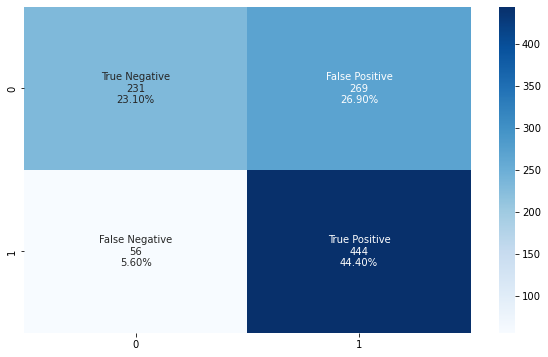

In [39]:
model_metrics(df['target'],df['compound'])

# Pattern

In [40]:
from pattern.en import sentiment

In [41]:
df=pd.read_csv("sentiment140.csv")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [42]:
def pattern_sentiment(sentence):
    sent=sentiment(sentence)
    if sent[0]<=0:
        return 0
    else:
        return 4

In [43]:
start=time()
df['compound'] = df['text'].apply(lambda text: pattern_sentiment(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",4
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [44]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
pt_acc=t/(t+f)
pt_acc

0.638

In [45]:
pt_time=end-start
print("The time taken:",pt_time)

The time taken: 0.9494132995605469


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       500
           4       0.67      0.55      0.60       500

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[361 139]
 [223 277]]


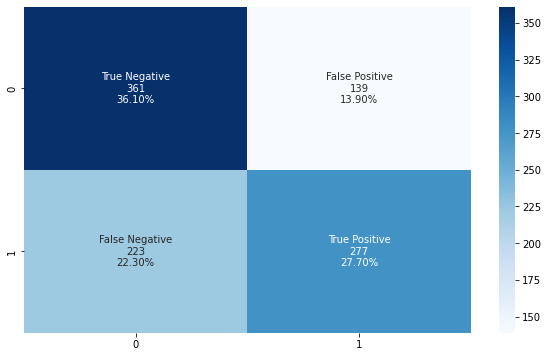

In [46]:
model_metrics(df['target'],df['compound'])

# Happy transformer

In [47]:
from happytransformer import HappyTextClassification 

In [48]:
df=pd.read_csv("sentiment140.csv")
df.head()
happy_tc = HappyTextClassification("DISTILBERT", "distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

12/07/2021 11:15:11 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [49]:
def ht_sentiment(sentence):
    result = happy_tc.classify_text(sentence)
    if result.label=="NEGATIVE":
        return 0
    else:
        return 4

In [50]:
start=time()
df['compound'] = df['text'].apply(lambda text: ht_sentiment(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [51]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
ht_acc=t/(t+f)
ht_acc

0.707

In [52]:
ht_time=end-start
print("The time taken:",ht_time)

The time taken: 71.92162036895752


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       500
           4       0.77      0.58      0.67       500

    accuracy                           0.71      1000
   macro avg       0.72      0.71      0.70      1000
weighted avg       0.72      0.71      0.70      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[415  85]
 [208 292]]


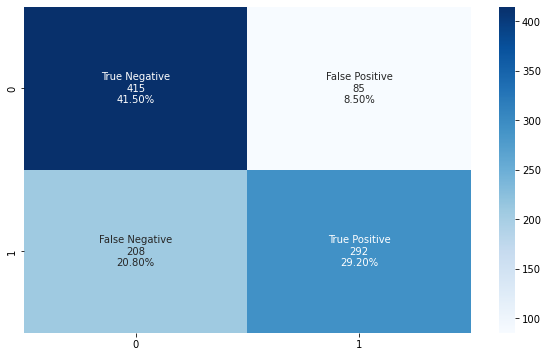

In [53]:
model_metrics(df['target'],df['compound'])

# NRC Lex

In [54]:
from nrclex import NRCLex

In [55]:
df=pd.read_csv("sentiment140.csv")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [56]:
def nrc_sentiment(sentence):
    nrc = NRCLex(sentence)
    pos=nrc.affect_frequencies['positive']
    neg=nrc.affect_frequencies['negative']
    if pos<=neg:
        return 0
    else:
        return 4

In [57]:
start=time()
df['compound'] = df['text'].apply(lambda text: nrc_sentiment(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [58]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
nrc_acc=t/(t+f)
nrc_acc

0.583

In [59]:
nrc_time=end-start
print("The time taken:",nrc_time)

The time taken: 1.389594316482544


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.56      0.79      0.65       500
           4       0.64      0.38      0.48       500

    accuracy                           0.58      1000
   macro avg       0.60      0.58      0.57      1000
weighted avg       0.60      0.58      0.57      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[393 107]
 [310 190]]


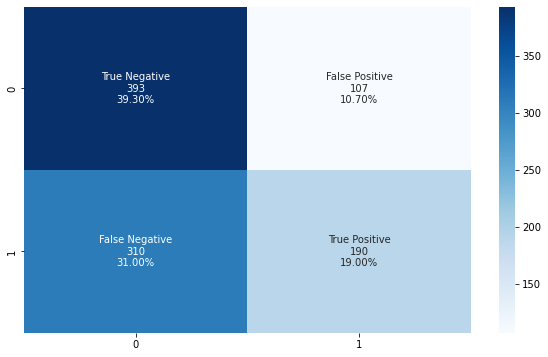

In [60]:
model_metrics(df['target'],df['compound'])

# Senticnet

In [61]:
from senticnet.senticnet import SenticNet

In [62]:
df=pd.read_csv("sentiment140.csv")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [63]:
def snet_sentiment(sentence):
    word=sentence.split()
    sent=0
    sn = SenticNet()
    for w in word:
        try:
            polarity_value = sn.polarity_value(w)
        except:
            pass
        else:
            sent+=float(polarity_value)
    if sent<0:
        return 0
    else:
        return 4

In [64]:
start=time()
df['compound'] = df['text'].apply(lambda text: snet_sentiment(text))
end=time()
df.head()

,target,ids,date,flag,user,text,compound
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",4
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,4
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",4


In [65]:
df["equal"]=np.where(df["target"] == df["compound"], True, False)
t=(df["equal"]==True).sum()
f=(df["equal"]==False).sum()
snet_acc=t/(t+f)
snet_acc

0.585

In [66]:
snet_time=end-start
print("The time taken:",snet_time)

The time taken: 0.027222394943237305


--------------Metrics-------------------
              precision    recall  f1-score   support

           0       0.71      0.29      0.41       500
           4       0.55      0.88      0.68       500

    accuracy                           0.58      1000
   macro avg       0.63      0.58      0.55      1000
weighted avg       0.63      0.58      0.55      1000


--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[145 355]
 [ 60 440]]


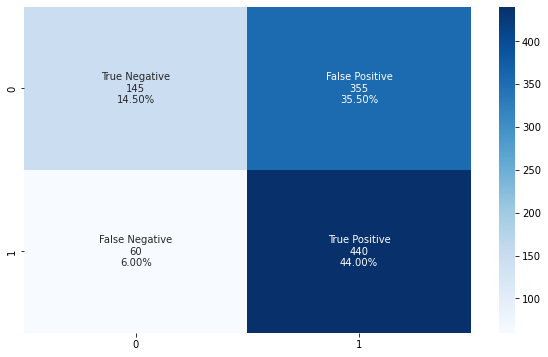

In [67]:
model_metrics(df['target'],df['compound'])

# Bar graph

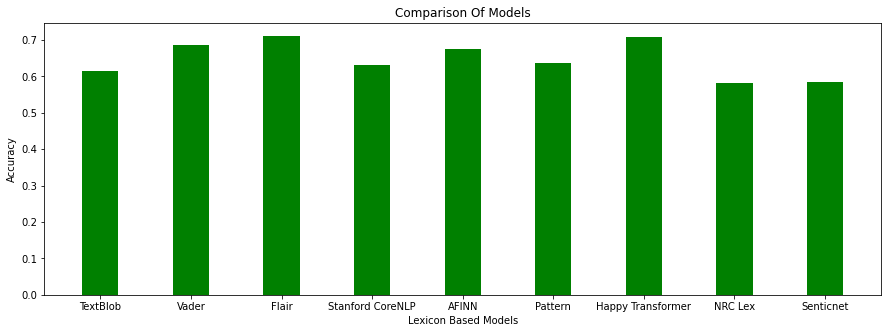

In [68]:
import matplotlib.pyplot as plt
models=('TextBlob','Vader','Flair','Stanford CoreNLP','AFINN','Pattern','Happy Transformer','NRC Lex','Senticnet')
acc_values=(tb_acc,vd_acc,flair_acc,core_acc,af_acc,pt_acc,ht_acc,nrc_acc,snet_acc)
fig = plt.figure(figsize = (15, 5))
plt.bar(models, acc_values, color ='green',width = 0.4)
plt.xlabel("Lexicon Based Models")
plt.ylabel("Accuracy")
plt.title("Comparison Of Models")
plt.show()

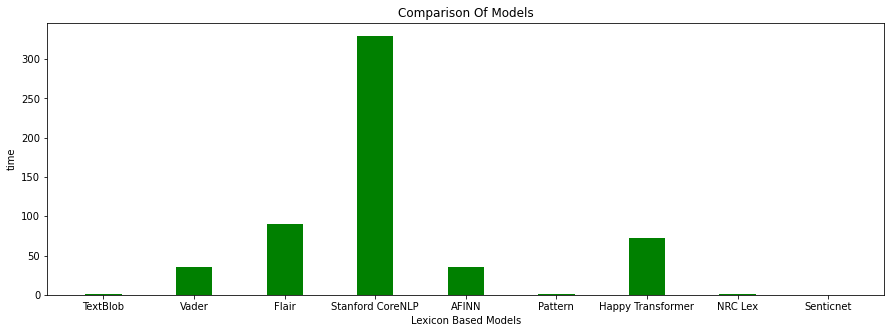

In [69]:
models=('TextBlob','Vader','Flair','Stanford CoreNLP','AFINN','Pattern','Happy Transformer','NRC Lex','Senticnet')
time_values=(tb_time,vd_time,flair_time,core_time,af_time,pt_time,ht_time,nrc_time,snet_time)
fig = plt.figure(figsize = (15, 5))
plt.bar(models, time_values, color ='green',width = 0.4)
plt.xlabel("Lexicon Based Models")
plt.ylabel("time")
plt.title("Comparison Of Models")
plt.show()

# Tweet collection

In [2]:
from googletrans import Translator

In [3]:
translator = Translator()

In [4]:
consumer_key='9N25TnKAVRlCnzwczo1H57AC9'
consumer_secret='75jWEcEvlDnEz49QkquoccNoaHHFkzAyF2OUByVqK0UpnuqllT'
access_token='1186607165944913920-BUl3h3wuCr8y7YNmXliBZUlBnS0GjG'
access_token_secret='uNLDlE1TVJ3bOkZbx85TbH2TFY4lP3Yjr04rW0QDs7sef'

In [5]:
import tweepy
import pandas as pd
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [63]:
def get_tweet(keyword):
    search_words = keyword
    date_since = "2020-11-16"
    tweets = tweepy.Cursor(api.search,
                  q=search_words,
                  lang="",
                  since=date_since).items(50)
    tweet_det=[]
    tweet_transdet=[]
    for tweet in tweets:
        tweet_det.append([tweet.id,tweet.lang,tweet.text,tweet.user.screen_name,tweet.user.name,tweet.created_at,tweet.user.location])
        if tweet.lang!="en":
            tw_trans = translator.translate(tweet.text)
            tweet_transdet.append([tweet.id,tweet.lang,tw_trans.text,tweet.user.screen_name,tweet.user.name,tweet.created_at,tweet.user.location])
        else:
            tweet_transdet.append([tweet.id,tweet.lang,tweet.text,tweet.user.screen_name,tweet.user.name,tweet.created_at,tweet.user.location])

    tweet_details = pd.DataFrame(data=tweet_det, columns=['Id','Lang','Tweet','Username','User','Date-Time','Location'])
    tweet_details.to_csv(keyword+".csv")
    tweet_transdetails = pd.DataFrame(data=tweet_transdet, columns=['Id','Lang','Tweet','Username','User','Date-Time','Location'])
    return tweet_transdetails

In [73]:
key1="government"
key1_tweet=get_tweet(key1)
key1_tweet.head()

,Id,Lang,Tweet,Username,User,Date-Time,Location
0,1469993081973977091,en,RT @WritersofColour: While we were distracted ...,K4rmaRules,Sharon,2021-12-12 11:30:36,Boris' Hell
1,1469993081780977664,en,"RT @Chude__: Onyeka Nwelue made a Movie ""the o...",Joshua1kalu,Joshua Kalu,2021-12-12 11:30:36,
2,1469993081634267137,en,"RT @Reprieve: 1,500 days\n214 weeks\n49 months...",ElDiego1986,bainsy*,2021-12-12 11:30:36,
3,1469993077590966274,en,RT @ninoboxer: Patel Patriot- Trump's Shadow G...,Broadle27048521,James Broadley,2021-12-12 11:30:35,Bradford
4,1469993076643012611,en,RT @newtgingrich: The consumer price index jum...,stu0016,Stu🇺🇸🇺🇸🇺🇸,2021-12-12 11:30:35,"Behind Enemy Lines, MD"


In [22]:
key2="voter"
key2_tweet=get_tweet(key2)
key2_tweet.head()

,Id,Lang,Tweet,Username,User,Date-Time,Location
0,1469987636668293121,en,RT @amyklobuchar: It's so important to me that...,chrisrosenbau12,Chris•Stands•Against•Fascism!,2021-12-12 11:08:58,
1,1469987636324536330,fr,RT @JasonGronert: Can we vote for a second ter...,cambogienne,Manon Collin,2021-12-12 11:08:58,"Caen, France"
2,1469987609015324672,en,Bit disappointed about all the shit replies in...,MoistenedTart,Ms Moistened Tart 🔥,2021-12-12 11:08:51,Yugambeh/Kombumerri land
3,1469987594536689668,fr,RT @ Charles71865770: @ECiotti Vote for Pecres...,liba97,Alérion 2,2021-12-12 11:08:48,
4,1469987577646227456,en,RT @amyklobuchar: It's so important to me that...,sue_dool,Sue_4_Cote,2021-12-12 11:08:44,Mississippi


# Pre-Processing

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sabrina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [26]:
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sabrina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def preprocess_tweet(tweet):
    #LowerCasing all tweets
    tweet=tweet.lower()
    #removing URL
    tweet=re.sub(r"http\S+|www\S+|https\S+","",tweet)
    #removing @ from tweets
    tweet=re.sub(r'\@\w+|\#+'," ",tweet)
    #removing punctuation from tweets
    tweet=tweet.translate(str.maketrans("","",string.punctuation))
    #removing rt from tweets
    tweet=re.sub(r'^rt[\s]+', '', tweet)
    #Stop Word removal
    tweet_tokens=word_tokenize(tweet)
    filtered_words=[word for word in tweet_tokens if word not in stop_words]
    #lemmatization
    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos='a') for w in filtered_words]
    return " ".join(lemma_words)

In [56]:
def preprocess_tweet2(tweet):
    #LowerCasing all tweets
    tweet=tweet.lower()
    #removing URL
    tweet=re.sub(r"http\S+|www\S+|https\S+","",tweet)
    #removing @ from tweets
    tweet=re.sub(r'\@\w+|\#+'," ",tweet)
    #removing punctuation from tweets
    tweet=tweet.translate(str.maketrans("","",string.punctuation))
    #removing rt from tweets
    tweet=re.sub(r'^rt[\s]+', '', tweet)
    #Stop Word removal
    tweet_tokens=word_tokenize(tweet)
    filtered_words=[word for word in tweet_tokens if word not in stop_words]
    #Stemming
    ps=PorterStemmer()
    stemmed_words=[ps.stem(w) for w in filtered_words]
    return " ".join(stemmed_words)

In [74]:
key1_tweet['clean_tweets'] = key1_tweet['Tweet'].apply(lambda Tweet: preprocess_tweet2(Tweet))
#key1_tweet.to_csv('key1_cleantweets.csv')
key1_tweet.tail()

,Id,Lang,Tweet,Username,User,Date-Time,Location,clean_tweets
45,1469993047022874629,en,RT @Maomento: On this day in 2019 Jeremy was t...,HelenBarbaraSmi,Helen Barbara Smith #IstandwithPoland 96.5%,2021-12-12 11:30:28,,day 2019 jeremi tragic four million vote short...
46,1469993046909534210,en,"@thesundaytimes Tbh, at this point if the poli...",Zoekc78,Zoe Cross,2021-12-12 11:30:28,"Worthing, England",tbh point polic arent go investig govern breec...
47,1469993046829768709,en,RT @msisodia: Excited to share that Delhi Gove...,punam23339960,punam sardana,2021-12-12 11:30:28,,excit share delhi govern curriculum wise2021 a...
48,1469993046376955905,en,This Sunday morning I’m grateful the storms th...,EndingsPossible,PossibleEndings,2021-12-12 11:30:28,,sunday morn ’ grate storm struck kentucki amp ...
49,1469993046192406528,en,RT @mrbenwexler: AMERICA: Where a guy making a...,fund_human,Human Fund,2021-12-12 11:30:28,"Fort Worth, TX",america guy make powerpoint overthrow govern o...


In [76]:
key1_tweet['clean_tweets'] = key1_tweet['Tweet'].apply(lambda Tweet: preprocess_tweet(Tweet))
#key1_tweet.to_csv('key1_cleantweets.csv')
key1_tweet.tail()

,Id,Lang,Tweet,Username,User,Date-Time,Location,clean_tweets,sentiment
45,1469993047022874629,en,RT @Maomento: On this day in 2019 Jeremy was t...,HelenBarbaraSmi,Helen Barbara Smith #IstandwithPoland 96.5%,2021-12-12 11:30:28,,day 2019 jeremy tragically four million votes ...,Negative
46,1469993046909534210,en,"@thesundaytimes Tbh, at this point if the poli...",Zoekc78,Zoe Cross,2021-12-12 11:30:28,"Worthing, England",tbh point police arent going investigate gover...,Negative
47,1469993046829768709,en,RT @msisodia: Excited to share that Delhi Gove...,punam23339960,punam sardana,2021-12-12 11:30:28,,excited share delhi governments curriculum wis...,Positive
48,1469993046376955905,en,This Sunday morning I’m grateful the storms th...,EndingsPossible,PossibleEndings,2021-12-12 11:30:28,,sunday morning ’ grateful storms struck kentuc...,Positive
49,1469993046192406528,en,RT @mrbenwexler: AMERICA: Where a guy making a...,fund_human,Human Fund,2021-12-12 11:30:28,"Fort Worth, TX",america guy making powerpoint overthrow govern...,Negative


In [55]:
key2_tweet['clean_tweets'] = key2_tweet['Tweet'].apply(lambda Tweet: preprocess_tweet(Tweet))
key2_tweet["clean_tweets"].replace("", np.NaN, inplace=True)
key2_tweet.dropna(inplace=True)
key2_tweet.to_csv('key2_cleantweets.csv')
key2_tweet.head()

,Id,Lang,Tweet,Username,User,Date-Time,Location,clean_tweets
0,1468946317766369280,en,"RT @ScottPresler: A week ago, democrats had a ...",revansCAAD8,revansCAAD8,2021-12-09 14:11:08,,week ago democrats lead 604526 voter registrat...
1,1468946311449874440,en,RT @ScottPresler: @mtgreenee @GOP Thank you. \...,Rebeckahtx,Rebeckahtx 🇺🇸,2021-12-09 14:11:07,"Florida, USA",thank 1 medical freedom amp patient protection...
2,1468946304470589446,fr,"RT @coherence_e: On December 9, 1905, the depu...",Benedicte1512,Bénédicte Buhagiar,2021-12-09 14:11:05,Nice-Paris,december 9 1905 deputy aristide briand voted l...
3,1468946303765958658,fr,RT @clement_mci: 84% of French people are read...,zrjp,zamora Mat : 6031,2021-12-09 14:11:05,,84 french people ready vote woman 2022 91 amon...
4,1468946300754444291,en,@tidemidwest @DezziDelight_ @bluestein Yes and...,JuanitaIsaac5,Juanita Isaac,2021-12-09 14:11:04,,yes part voter always


In [46]:
def sentiment_analysis(sentence):
    text = Sentence(sentence)
    classifier.predict(text)
    label = str(text.labels[0]).split()[0]
    if label=="NEGATIVE":
        return "Negative"
    else:
        return "Positive"

In [47]:
def sentiment_classify(df):
    df['sentiment'] = df['clean_tweets'].apply(lambda clean_tweets: sentiment_analysis(clean_tweets))
    pos=(df["sentiment"]=="Positive").sum()
    neg=(df["sentiment"]=="Negative").sum()
    return pos,neg

In [75]:
pos1,neg1=sentiment_classify(key1_tweet)
key1_tweet.to_csv('key1_cleantweets_stem.csv')
key1_tweet.head(20)

,Id,Lang,Tweet,Username,User,Date-Time,Location,clean_tweets,sentiment
0,1469993081973977091,en,RT @WritersofColour: While we were distracted ...,K4rmaRules,Sharon,2021-12-12 11:30:36,Boris' Hell,distract 10 christma parti govern rubberstamp ...,Negative
1,1469993081780977664,en,"RT @Chude__: Onyeka Nwelue made a Movie ""the o...",Joshua1kalu,Joshua Kalu,2021-12-12 11:30:36,,onyeka nwelu made movi side stori ojukwu life ...,Positive
2,1469993081634267137,en,"RT @Reprieve: 1,500 days\n214 weeks\n49 months...",ElDiego1986,bainsy*,2021-12-12 11:30:36,,1500 day 214 week 49 month 41 year ’ long brit...,Negative
3,1469993077590966274,en,RT @ninoboxer: Patel Patriot- Trump's Shadow G...,Broadle27048521,James Broadley,2021-12-12 11:30:35,Bradford,patel patriot trump shadow governmentdevolut,Negative
4,1469993076643012611,en,RT @newtgingrich: The consumer price index jum...,stu0016,Stu🇺🇸🇺🇸🇺🇸,2021-12-12 11:30:35,"Behind Enemy Lines, MD",consum price index jump 68 biggest increas sin...,Negative
5,1469993076496158725,en,@L_Mitch23 @HackedOffHugh Nothing about this g...,FluffiesForLife,Mrbunny,2021-12-12 11:30:35,Wales,noth govern funni,Negative
6,1469993075426480128,en,RT @AP: BREAKING: A special Customs and Border...,1DancingCrane,sean mackey,2021-12-12 11:30:34,Denver,break special custom border protect unit use s...,Positive
7,1469993075258925058,en,RT @GoodLawProject: The law says we are all eq...,TheBronzeH,Bronze Horseman#🏃🏻‍♀️,2021-12-12 11:30:34,Cambridgeshire,law say equal metropolitan polic need appli in...,Positive
8,1469993074092822533,en,RT @GoodLawProject: The law says we are all eq...,parity_warrior,parity-warrior,2021-12-12 11:30:34,South Africa,law say equal metropolitan polic need appli in...,Positive
9,1469993073673486343,en,RT @MattH_4America: Nobody should be allowed t...,GoingBySophie,Karen,2021-12-12 11:30:34,"Massachusetts, USA",nobodi allow spend 30 40 year govern,Negative


In [77]:
pos1,neg1=sentiment_classify(key1_tweet)
key1_tweet.to_csv('key1_cleantweets_lemm.csv')
key1_tweet.head(20)

,Id,Lang,Tweet,Username,User,Date-Time,Location,clean_tweets,sentiment
0,1469993081973977091,en,RT @WritersofColour: While we were distracted ...,K4rmaRules,Sharon,2021-12-12 11:30:36,Boris' Hell,distracted 10s christmas party government rubb...,Negative
1,1469993081780977664,en,"RT @Chude__: Onyeka Nwelue made a Movie ""the o...",Joshua1kalu,Joshua Kalu,2021-12-12 11:30:36,,onyeka nwelue made movie side story ojukwus li...,Positive
2,1469993081634267137,en,"RT @Reprieve: 1,500 days\n214 weeks\n49 months...",ElDiego1986,bainsy*,2021-12-12 11:30:36,,1500 days 214 weeks 49 months 41 years ’ long ...,Positive
3,1469993077590966274,en,RT @ninoboxer: Patel Patriot- Trump's Shadow G...,Broadle27048521,James Broadley,2021-12-12 11:30:35,Bradford,patel patriot trumps shadow governmentdevolution,Negative
4,1469993076643012611,en,RT @newtgingrich: The consumer price index jum...,stu0016,Stu🇺🇸🇺🇸🇺🇸,2021-12-12 11:30:35,"Behind Enemy Lines, MD",consumer price index jumped 68 big increase si...,Negative
5,1469993076496158725,en,@L_Mitch23 @HackedOffHugh Nothing about this g...,FluffiesForLife,Mrbunny,2021-12-12 11:30:35,Wales,nothing government funny,Negative
6,1469993075426480128,en,RT @AP: BREAKING: A special Customs and Border...,1DancingCrane,sean mackey,2021-12-12 11:30:34,Denver,breaking special customs border protection uni...,Negative
7,1469993075258925058,en,RT @GoodLawProject: The law says we are all eq...,TheBronzeH,Bronze Horseman#🏃🏻‍♀️,2021-12-12 11:30:34,Cambridgeshire,law says equal metropolitan police need apply ...,Positive
8,1469993074092822533,en,RT @GoodLawProject: The law says we are all eq...,parity_warrior,parity-warrior,2021-12-12 11:30:34,South Africa,law says equal metropolitan police need apply ...,Positive
9,1469993073673486343,en,RT @MattH_4America: Nobody should be allowed t...,GoingBySophie,Karen,2021-12-12 11:30:34,"Massachusetts, USA",nobody allowed spend 30 40 years government,Negative


In [44]:
n=len(key1_tweet)
pper1=pos1*100/n
nper1=neg1*100/n
print("Positive sentiment percentage: ",pper1)
print("Negative sentiment percentage: ",nper1)

Positive sentiment percentage:  30.150753768844222
Negative sentiment percentage:  69.84924623115577


In [56]:
pos2,neg2=sentiment_classify(key2_tweet)
key2_tweet.head()

,Id,Lang,Tweet,Username,User,Date-Time,Location,clean_tweets,sentiment
0,1468946317766369280,en,"RT @ScottPresler: A week ago, democrats had a ...",revansCAAD8,revansCAAD8,2021-12-09 14:11:08,,week ago democrats lead 604526 voter registrat...,Negative
1,1468946311449874440,en,RT @ScottPresler: @mtgreenee @GOP Thank you. \...,Rebeckahtx,Rebeckahtx 🇺🇸,2021-12-09 14:11:07,"Florida, USA",thank 1 medical freedom amp patient protection...,Positive
2,1468946304470589446,fr,"RT @coherence_e: On December 9, 1905, the depu...",Benedicte1512,Bénédicte Buhagiar,2021-12-09 14:11:05,Nice-Paris,december 9 1905 deputy aristide briand voted l...,Positive
3,1468946303765958658,fr,RT @clement_mci: 84% of French people are read...,zrjp,zamora Mat : 6031,2021-12-09 14:11:05,,84 french people ready vote woman 2022 91 amon...,Positive
4,1468946300754444291,en,@tidemidwest @DezziDelight_ @bluestein Yes and...,JuanitaIsaac5,Juanita Isaac,2021-12-09 14:11:04,,yes part voter always,Positive


In [57]:
n=len(key2_tweet)
pper2=pos2*100/n
nper2=neg2*100/n
print("Positive sentiment percentage: ",pper2)
print("Negative sentiment percentage: ",nper2)

Positive sentiment percentage:  58.29145728643216
Negative sentiment percentage:  41.70854271356784


In [48]:
winner=key1 if (pper1>pper2) else key2
loser=key2 if (pper1>pper2) else key1
print(winner,"has a more positive sentiment than",loser)

government has a more positive sentiment than election


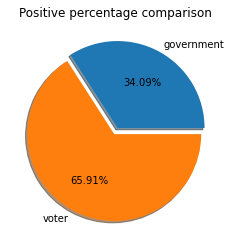

In [58]:
keys=(key1,key2)
percentage=(pper1,pper2)
plt.pie(percentage,labels=keys,explode=[0.04,0.04],shadow = True,autopct='%1.2f%%')
plt.title("Positive percentage comparison")
plt.show()

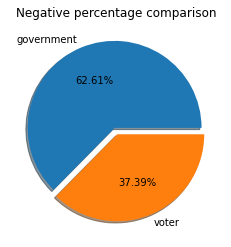

In [59]:
keys=(key1,key2)
percentage=(nper1,nper2)
plt.pie(percentage,labels=keys,explode=[0.04,0.04],shadow = True,autopct='%1.2f%%')
plt.title("Negative percentage comparison")
plt.show()

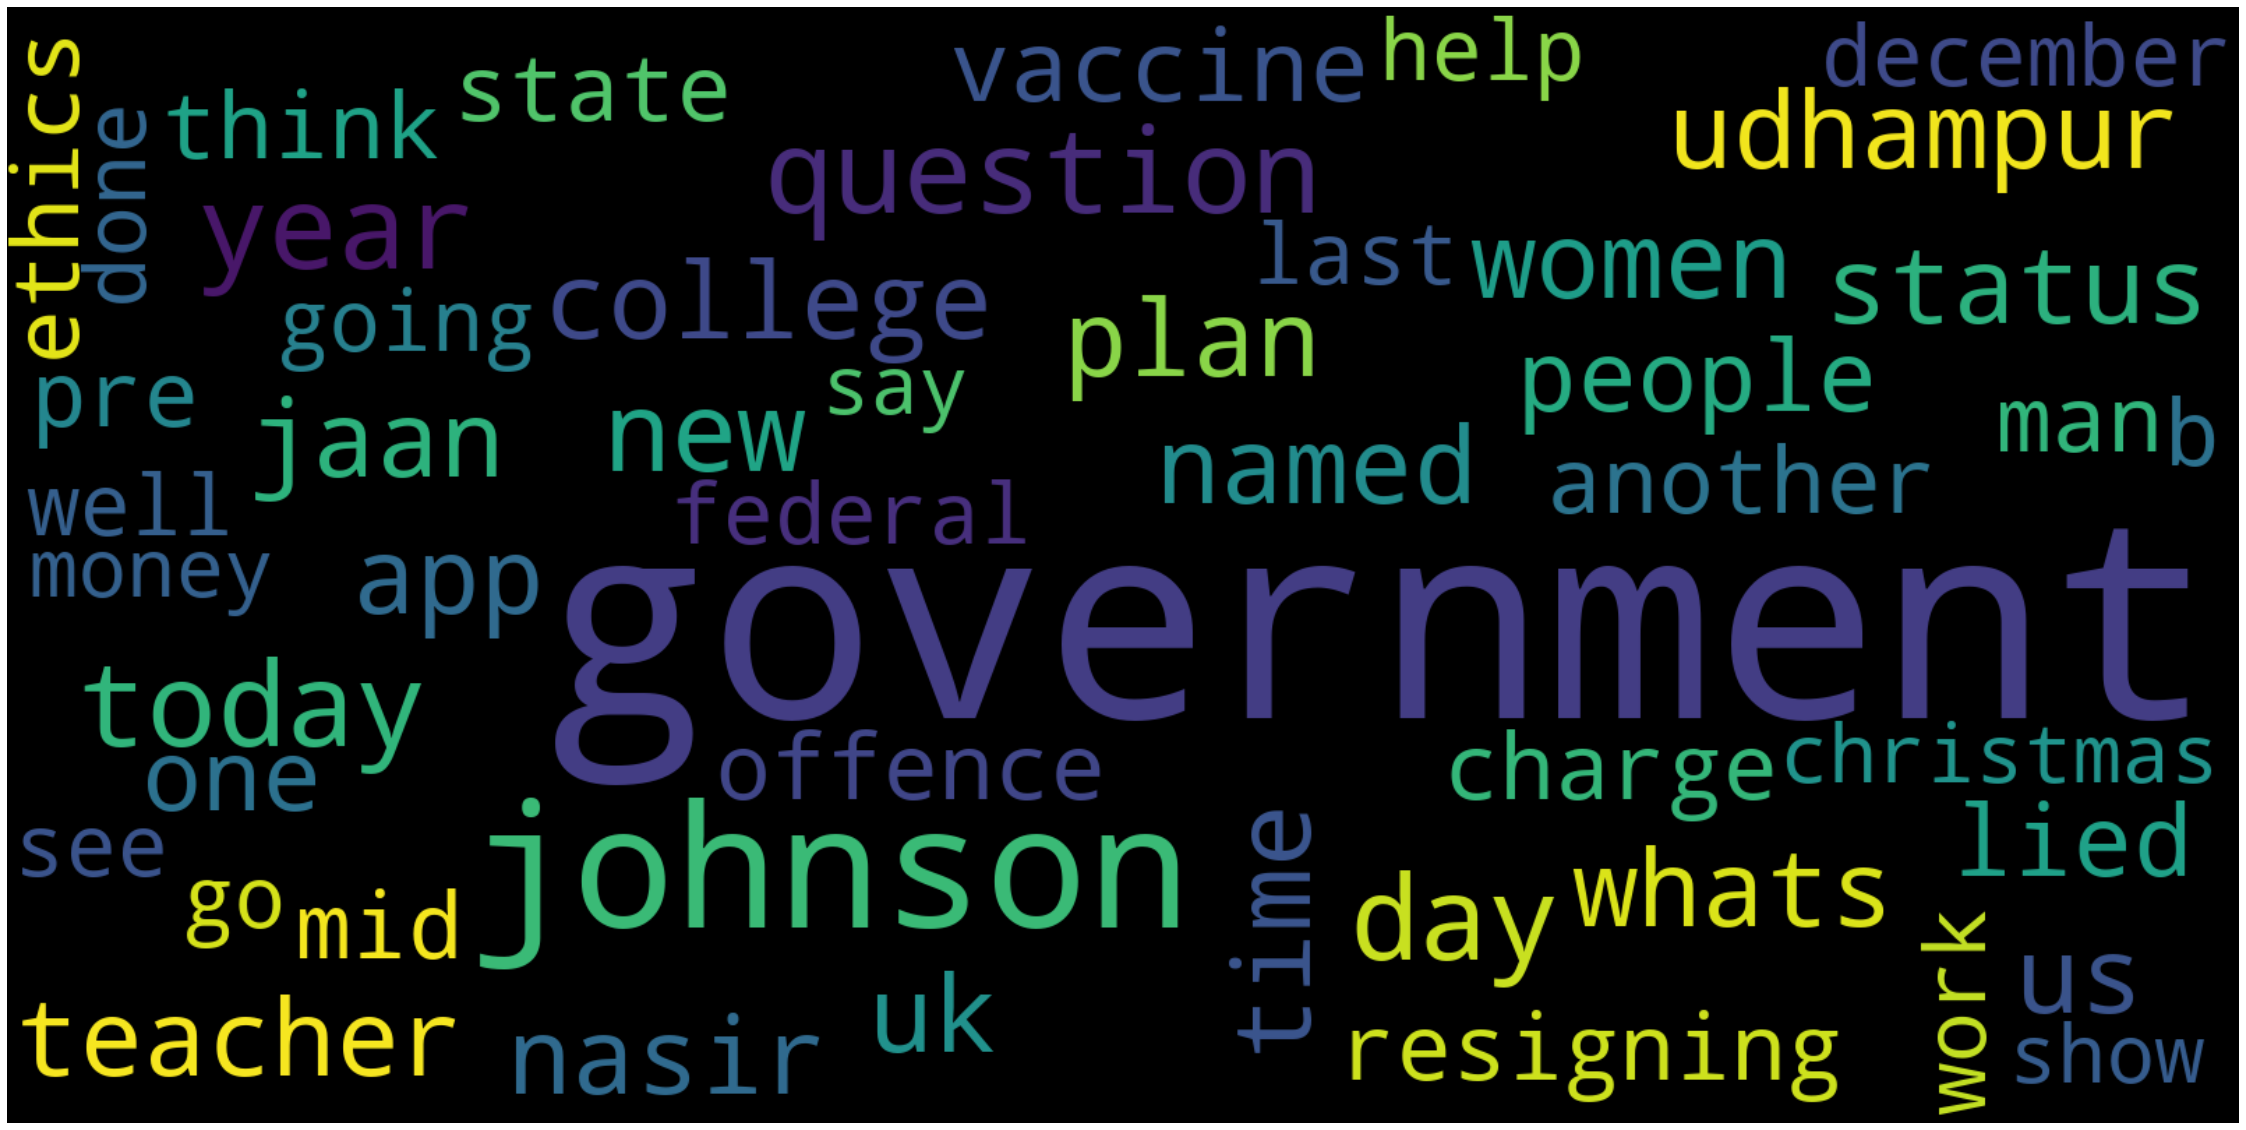

In [51]:
from wordcloud import WordCloud, STOPWORDS
string=key1_tweet["clean_tweets"].str.cat(sep=' ')
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

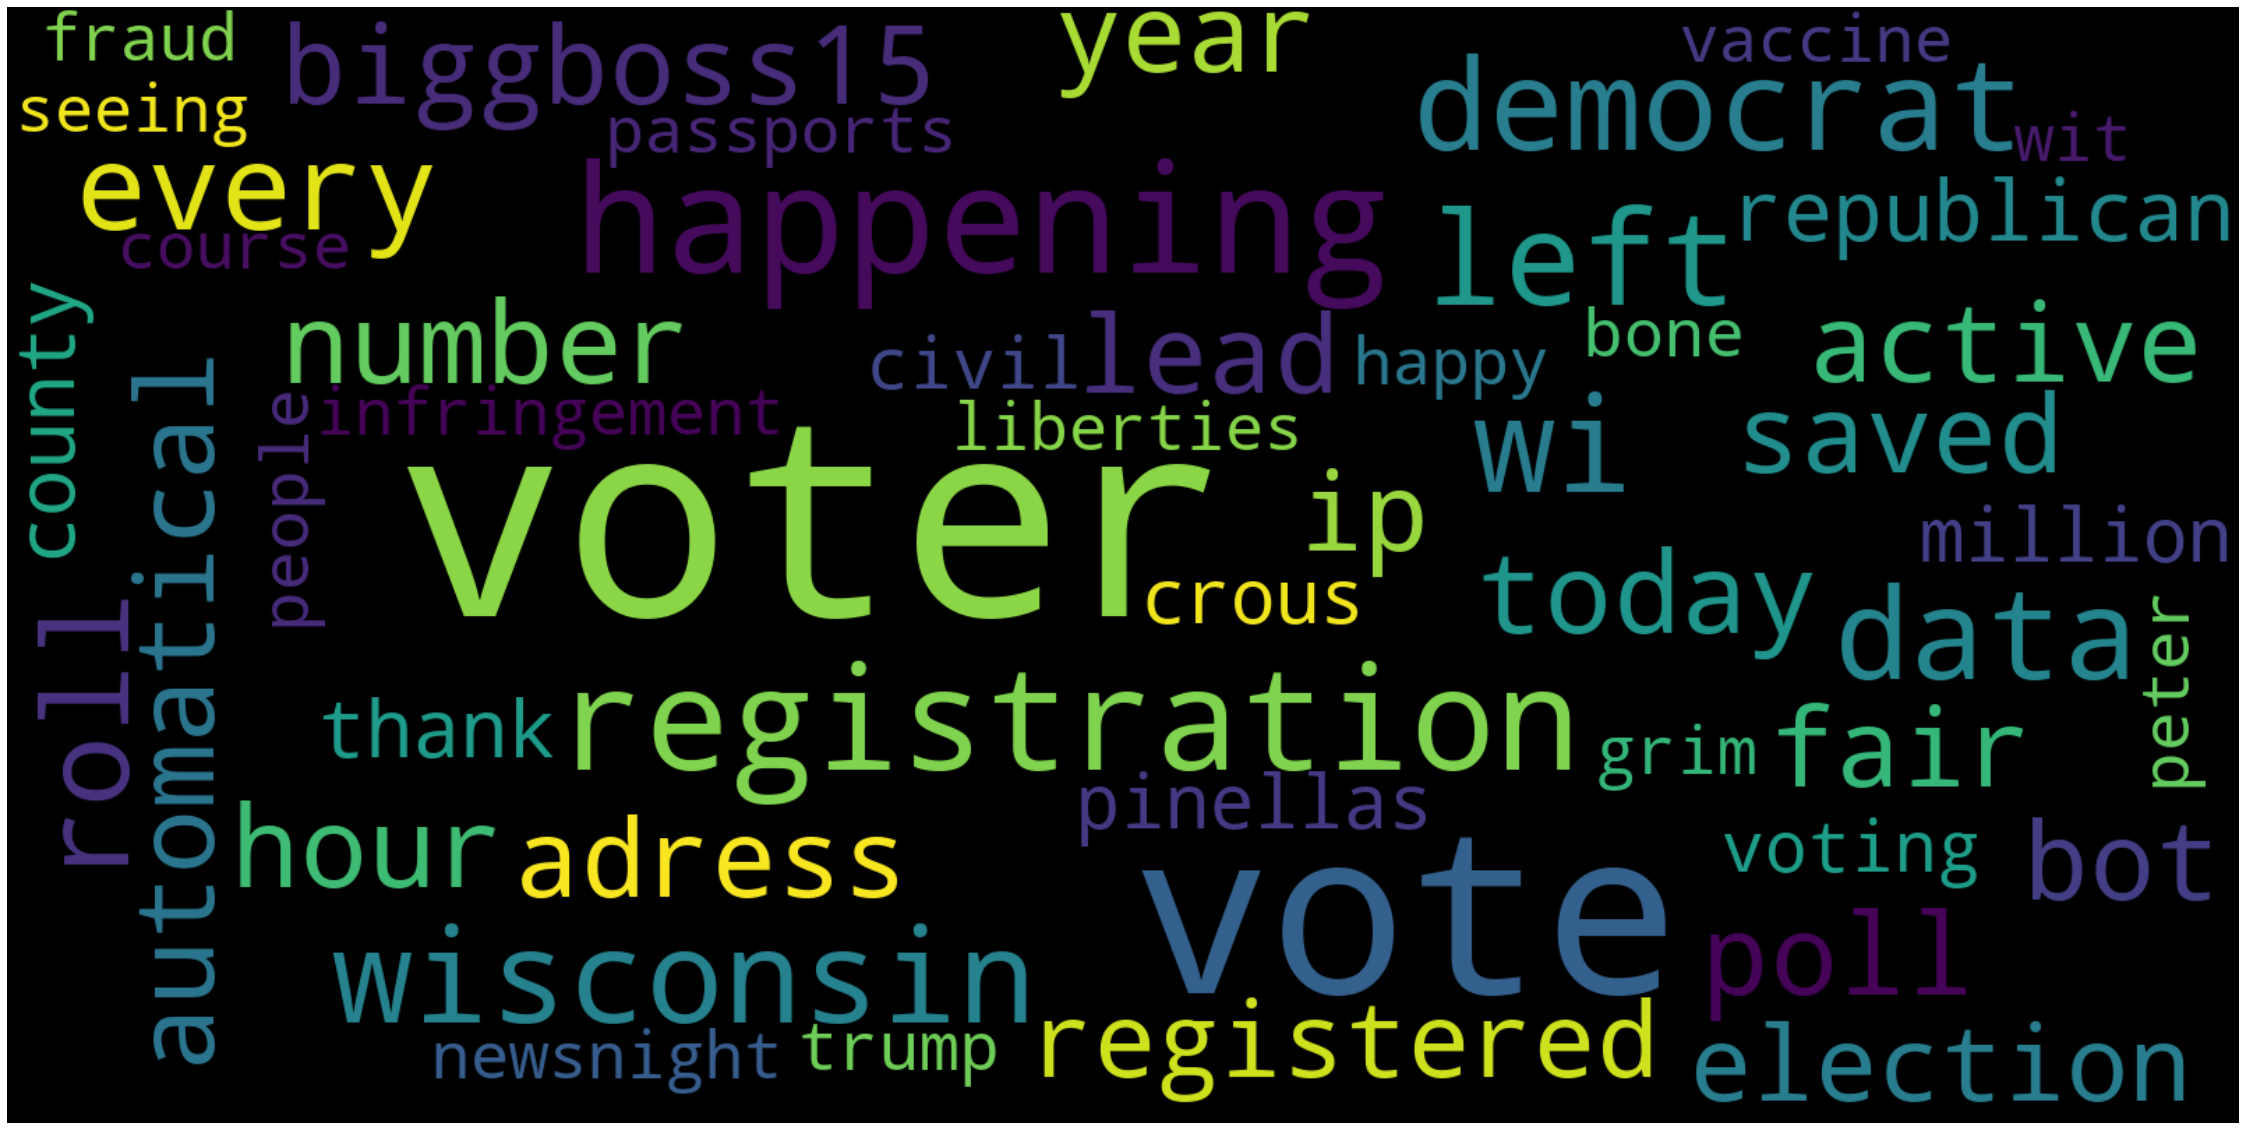

In [60]:
from wordcloud import WordCloud, STOPWORDS
string=key2_tweet["clean_tweets"].str.cat(sep=' ')
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()